In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load fresh copy
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)

In [3]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Impute missing values


In [9]:
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22544\3101947927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22544\3101947927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
import numpy as np
np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0)

(array([-6.94341436e-17, -1.09937394e-16,  3.09560557e-16, -3.47170718e-17,
        -4.33963397e-18, -1.14855646e-15, -1.09937394e-16, -1.08490849e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [15]:
print("Train set class balance:", y_train.value_counts(normalize=True))
print("Test set  class balance:", y_test.value_counts(normalize=True))

Train set class balance: Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Test set  class balance: Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the scaled data
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC-AUC

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC-AUC: 0.812962962962963


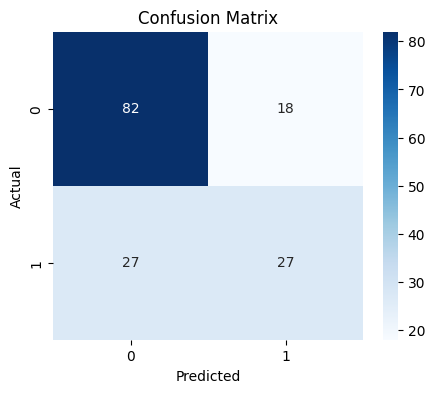

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

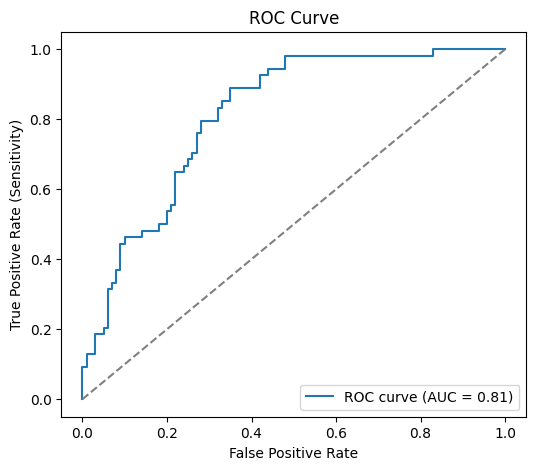

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [26]:
print(classification_report(y_test, y_pred, target_names=["No Diabetes","Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.75      0.82      0.78       100
    Diabetes       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

In [33]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_rf, target_names=["No Diabetes", "Diabetes"]))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

 No Diabetes       0.81      0.87      0.84       100
    Diabetes       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

ROC-AUC: 0.8178703703703704


In [30]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [31]:
# from imblearn.over_sampling import SMOTE

# from sklearn.model_selection import train_test_split

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# # Train again
# rf.fit(X_train_resampled, y_train_resampled)
# y_pred_smote = rf.predict(X_test_scaled)
# print(classification_report(y_test, y_pred_smote, target_names=["No Diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.84      0.77      0.80       100
    Diabetes       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



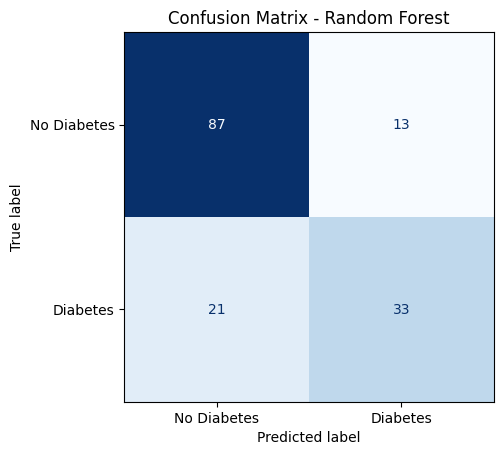

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test_scaled,
    y_test,
    display_labels=["No Diabetes", "Diabetes"],
    cmap="Blues",
    colorbar=False
)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Model Comparison:

Built Logistic Regression baseline (Accuracy = 0.71, Recall = 0.50)

Improved to Random Forest model (Accuracy = 0.78, Recall = 0.61, ROC-AUC = 0.82)

Enhanced diabetic patient detection while maintaining high precision.

Identified key predictors: Glucose, BMI, Age, and Insulin.

In [35]:
import joblib

# Save the trained model
joblib.dump(rf, "../src/random_forest_model.pkl")

# Save the StandardScaler too (important for consistent input scaling later)
joblib.dump(scaler, "../src/scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [36]:
import joblib

# Load model and scaler
model = joblib.load("../src/random_forest_model.pkl")
scaler = joblib.load("../src/scaler.pkl")

# Test with sample input
sample = [[2, 120, 70, 30, 100, 25.3, 0.5, 40]]  # example patient data
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Prediction:", "Diabetes" if prediction[0]==1 else "No Diabetes")

Prediction: No Diabetes


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
